In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from factor_data import FactorData
from price_data import PriceData
from factor_model import FactorModel
from pca import PCA
from clustering import Cluster
from find_pairs import PairsTrade

Get Price Data from Local Folder
Generated Monthly Return.
Get Price Data from Local Folder
Generated Monthly Return.
Concatenated all factor dataframe

Running Time Series Regression......
                

723 of ticker's Time Series Factors have been generated.

-----------------------------------------------------------------------

                
Postprocessing Factor Data ......
        
        
Done.

Cumulative sum of proportion of variance


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,0.312511,0.415384,0.510119,0.600093,0.676294,0.742819,0.791238,0.833632,0.873498,0.906659,0.937761,0.965711,0.988024,1.0


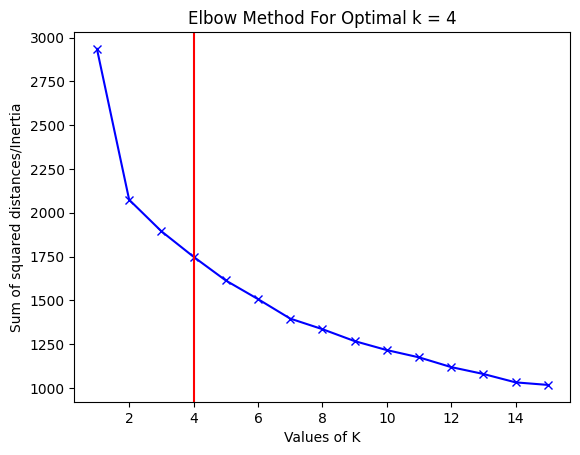

,cluster,lookback_return
0,0,117
1,1,23
2,2,85
3,3,40


--------- Runing Cluster 0 ---------------
--------- Runing Cluster 1 ---------------
--------- Runing Cluster 2 ---------------
--------- Runing Cluster 3 ---------------


In [9]:
start = "2017-01-01"
end = "2020-01-01"

display = False

sample_data = PriceData(["all"], start=start, end=end, refresh=False)
lookback_data = PriceData(["all"], start='2020-01-01', end='2020-02-01',ticker_ref_date="2022-01-01", refresh=False)
factors = FactorData("all", frequency="m", start=start, end=end)



_factor_model = FactorModel(
                            sample_data.asset_return, 
                            factors.factor_data,
                            ts_pvalues_threshold=0.5,
                            factor_hard_cap=15,
                            coff_std_limit=3
)

_pca = PCA(_factor_model.clustering_coefficients)

cluster = Cluster(
                  _pca.pca,
                  method="GMM",
                  number_of_cluster=None,
                  graph=display
                )

pairs_trade = PairsTrade(
                         _factor_model,
                         cluster, 
                         sample_data, 
                         lookback_data,
                         test_percentile=0.4,
                         display=display
                        )

In [10]:
pairs_trade.pairs

,long,short,hedge_ratio,is_contin,adf_p_values,long_lb_return,short_lb_return,latest_zscore,cluster,short_amount
174,XOM,NI,2.704367,True,0.016943,-0.123836,0.078367,3.454061,0,-1.846293
330,CVX,XYL,1.439718,True,0.001022,-0.117681,0.022668,3.024548,0,-0.358864
353,CVX,RSG,1.401944,True,0.041359,-0.117681,0.058110,3.614844,0,-0.316490
361,CVX,ICE,1.334293,True,0.025176,-0.117681,0.076292,4.159018,0,1.565527
363,CVX,AEE,1.649169,True,0.029245,-0.117681,0.078896,2.702652,0,-0.425160
...,...,...,...,...,...,...,...,...,...,...
3640,ALXN,FTNT,8.618682,True,0.022963,-0.078357,0.051787,2.038645,3,-2.799671
3647,ISRG,BDX,0.717575,True,0.000570,-0.062753,0.009687,3.243114,3,-0.885403
3707,PRU,CAR,2.294224,True,0.022643,-0.039856,-0.015902,0.582141,3,-0.635171
3716,PRU,MYL,2.331546,True,0.042488,-0.039856,0.037288,-0.304643,3,1.186037


In [12]:
initial_investment = 1000000

In [14]:
initial_investment / len(pairs_trade.pairs)

12345.67901234568